In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import struct
import pandas as pd
import seaborn as sns
from math import e
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)


In [21]:
name = 'Picccard'
direction = 'negx'
#name = 'argos-constanca'
#direction = 'posy'
#name = 'argos-felix'
#direction = 'negy'
name = 'argos-toyger'
#direction = 'posy'
#name = 'euler_explosion'
#direction = 'negy'
#name = 'flight_2'
#direction = 'posy'
#name = 'Helvetia'

log = '../../cats-logs/log_parsing/output/' + name + '/processed/'
log_imu = log + name + ' - imu_processed.csv'
log_baro = log + name + ' - baro_processed.csv'
log_filtered = log + name + ' - filtered_data_info_processed.csv'

imu_data_df = pd.read_csv(log_imu) 
baro_data_df = pd.read_csv(log_baro) 
filtered_data_df = pd.read_csv(log_filtered) 

imu_0 = imu_data_df.loc[imu_data_df['id'] == 'IMU0']
imu_1 = imu_data_df.loc[imu_data_df['id'] == 'IMU1']

baro_0 = baro_data_df.loc[baro_data_df['id'] == 'BARO0']
baro_1 = baro_data_df.loc[baro_data_df['id'] == 'BARO1']
baro_2 = baro_data_df.loc[baro_data_df['id'] == 'BARO2']


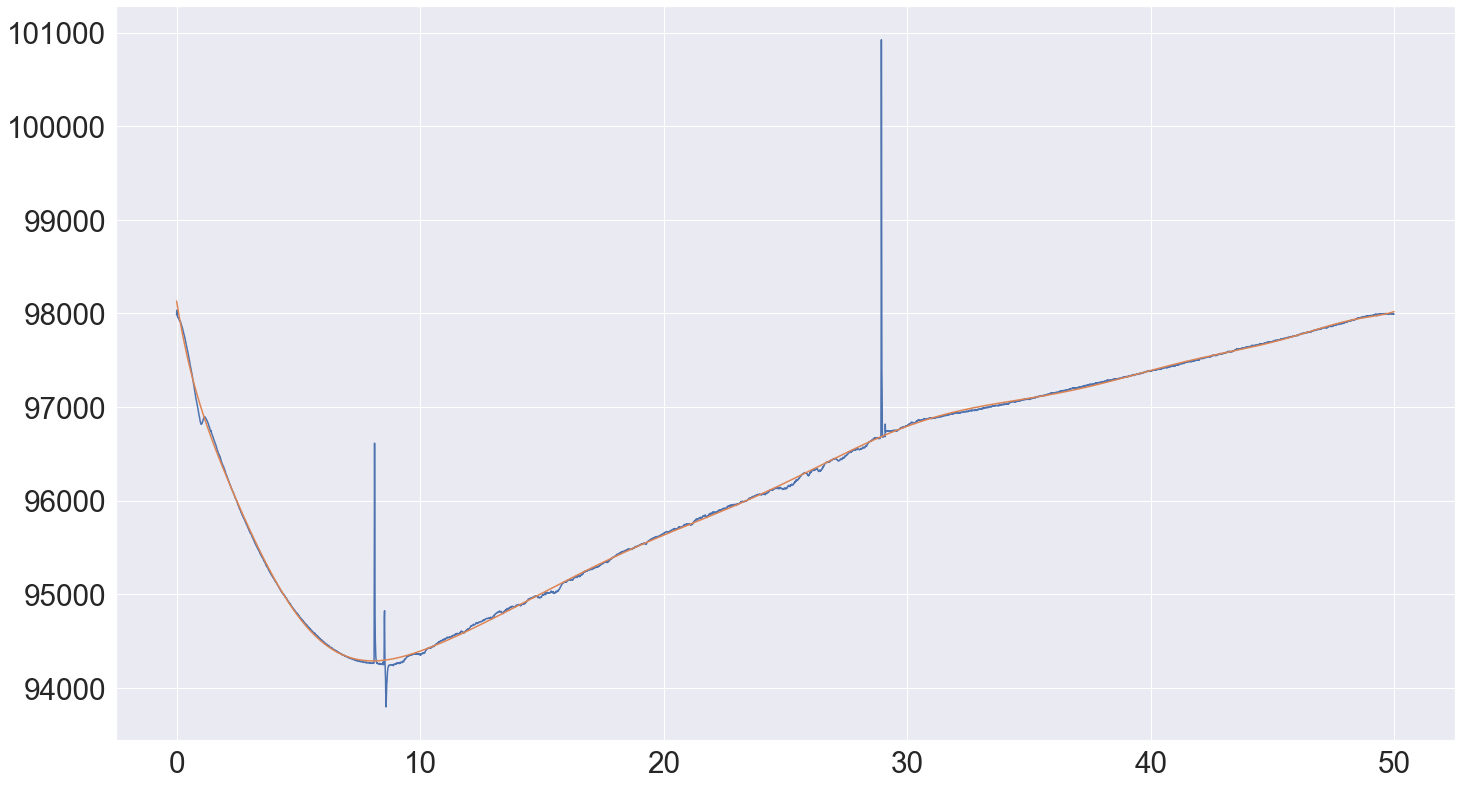

[-6.09846193e-17  2.79599150e-14 -5.67967562e-12  6.78499400e-10
 -5.32390218e-08  2.89827980e-06 -1.12597279e-04  3.15968503e-03
 -6.40383671e-02  9.26415883e-01 -9.32380945e+00  6.24363813e+01
 -2.60715710e+02  6.73219986e+02 -1.60135414e+03  9.81306274e+04]


In [138]:
import numpy as np
Ts = 1/100
signal_start_thrust = 23
signal_size_pressure = 5000
set_to_0_time = 0.1
raw_pressure = np.zeros(signal_size_pressure)
t = np.zeros(signal_size_pressure)


for k in range(signal_size_pressure):
    raw_pressure[k] = float(baro_0.iloc[signal_start_thrust + k].P)/3 + float(baro_1.iloc[signal_start_thrust + k].P)/3 + float(baro_2.iloc[signal_start_thrust + k].P)/3
    t[k] = imu_0.iloc[signal_start_thrust + k].ts + set_to_0_time
        
fit = np.polyfit(t, raw_pressure,15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_pressure)
plt.plot(t, fitted_curve)
plt.show()
print(fit)


max(velocity_new)

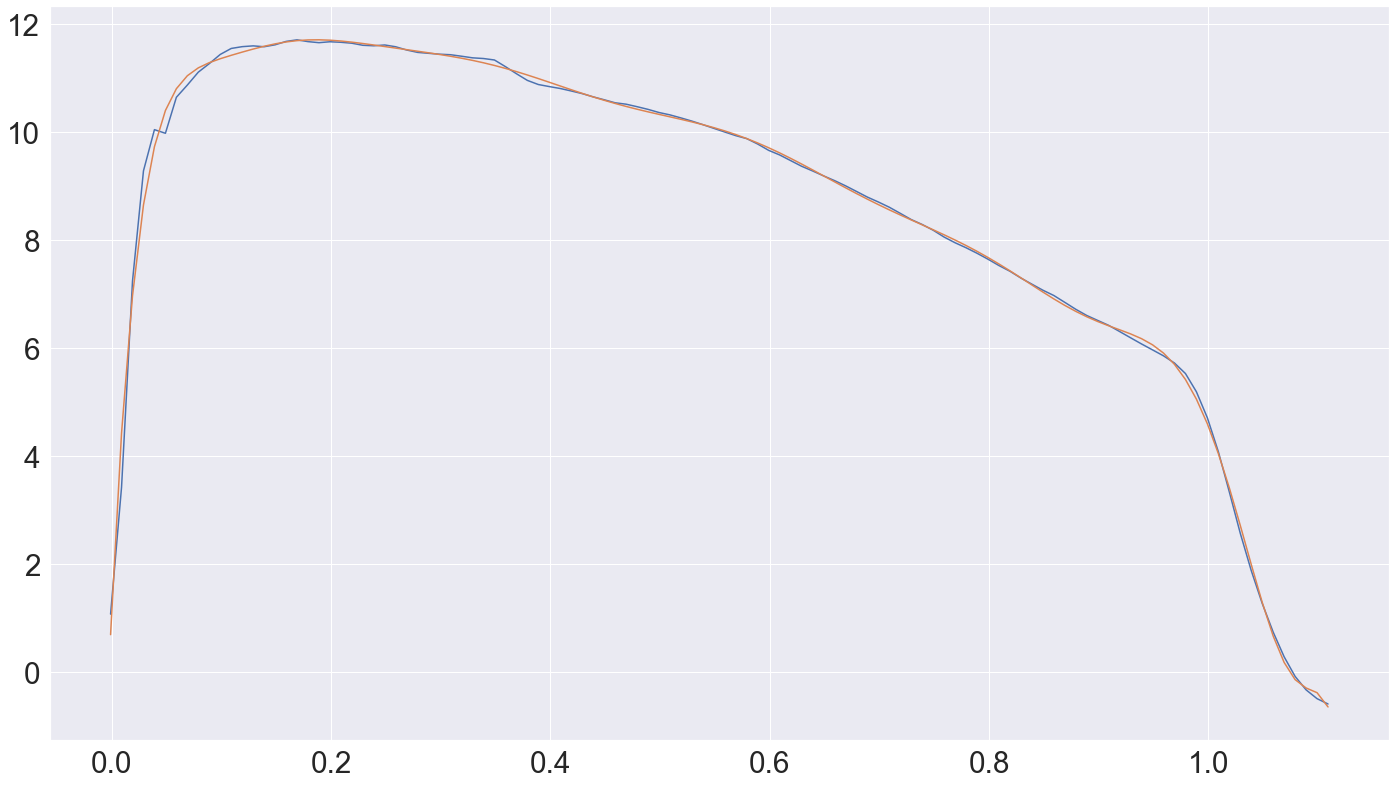

[-7.74384180e+06  6.08296377e+07 -2.13568117e+08  4.41789674e+08
 -5.97189439e+08  5.52253223e+08 -3.54499448e+08  1.55874816e+08
 -4.42126329e+07  6.42928691e+06  3.24708141e+05 -3.53925326e+05
  7.33555220e+04 -7.72424267e+03  4.30117076e+02  1.12707667e+00]
[-1.000e-03  9.000e-03  1.900e-02  2.900e-02  3.900e-02  4.900e-02
  5.900e-02  6.900e-02  7.900e-02  8.900e-02  9.900e-02  1.090e-01
  1.190e-01  1.290e-01  1.390e-01  1.490e-01  1.590e-01  1.690e-01
  1.790e-01  1.890e-01  1.990e-01  2.090e-01  2.190e-01  2.290e-01
  2.390e-01  2.490e-01  2.590e-01  2.690e-01  2.790e-01  2.890e-01
  2.990e-01  3.090e-01  3.190e-01  3.290e-01  3.390e-01  3.490e-01
  3.590e-01  3.690e-01  3.790e-01  3.890e-01  3.990e-01  4.090e-01
  4.190e-01  4.290e-01  4.390e-01  4.490e-01  4.590e-01  4.690e-01
  4.790e-01  4.890e-01  4.990e-01  5.090e-01  5.190e-01  5.290e-01
  5.390e-01  5.490e-01  5.590e-01  5.690e-01  5.790e-01  5.890e-01
  5.990e-01  6.090e-01  6.190e-01  6.290e-01  6.390e-01  6.490e-01
  

In [139]:
signal_size_thrust = 112

raw_acc_x = np.zeros(signal_size_thrust)
raw_acc_y = np.zeros(signal_size_thrust)
raw_acc_z = np.zeros(signal_size_thrust)
t = np.zeros(signal_size_thrust)



for k in range(signal_size_thrust):

    raw_acc_x[k] = (imu_0.iloc[signal_start_thrust + k].Ax + imu_1.iloc[signal_start_thrust + k].Ax)/2
    raw_acc_y[k] = (imu_0.iloc[signal_start_thrust + k].Ay + imu_1.iloc[signal_start_thrust + k].Ay)/2
    raw_acc_z[k] = (imu_0.iloc[signal_start_thrust + k].Az + imu_1.iloc[signal_start_thrust + k].Az)/2
    t[k] = imu_0.iloc[signal_start_thrust + k].ts + set_to_0_time

fit = np.polyfit(t, raw_acc_y, 15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_acc_y)
plt.plot(t, fitted_curve)
plt.show()
print(fit)
print(t)
    

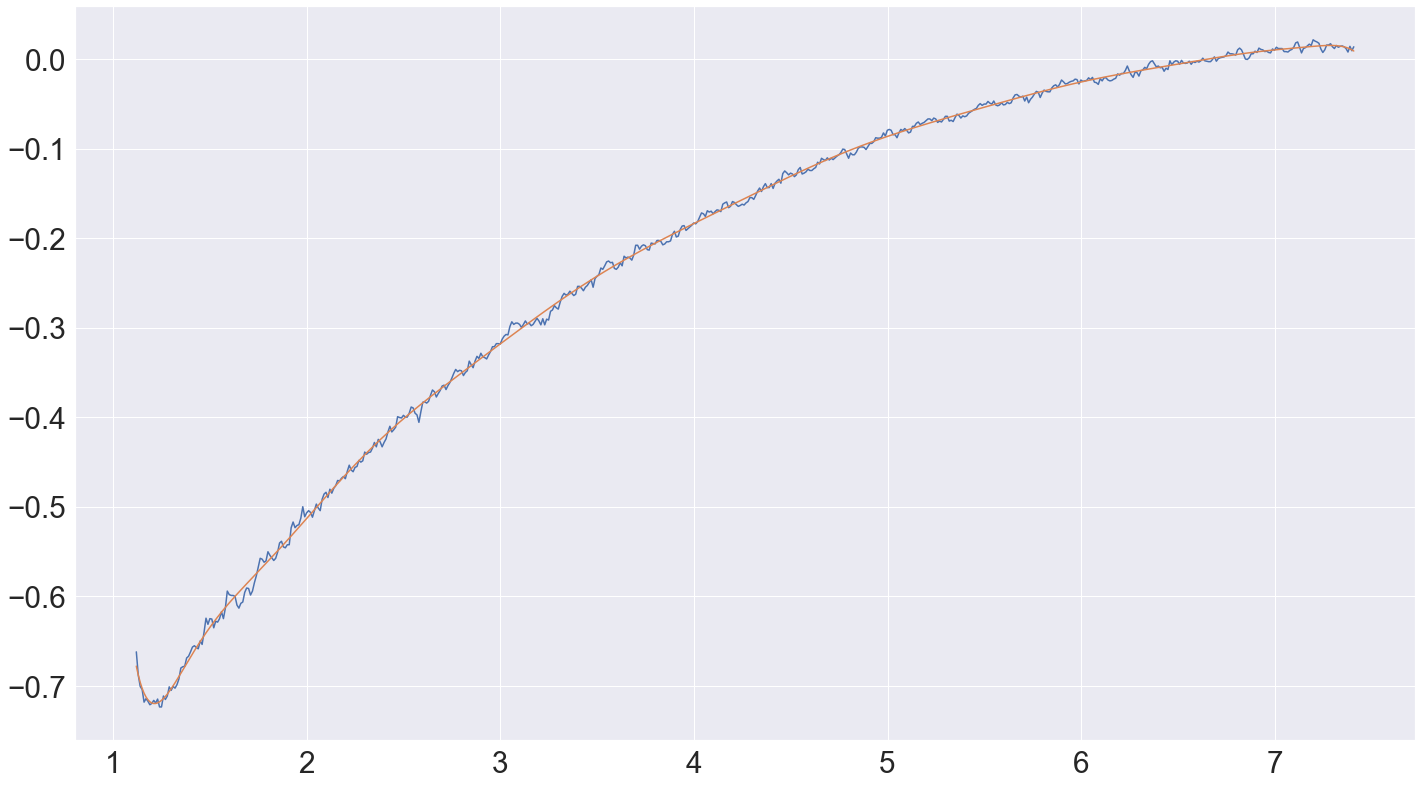

[-1.01505019e-06  6.73326573e-05 -2.04871842e-03  3.78894206e-02
 -4.75797931e-01  4.29224547e+00 -2.87004218e+01  1.44657103e+02
 -5.53372010e+02  1.60445940e+03 -3.49239635e+03  5.59701248e+03
 -6.38499340e+03  4.88926059e+03 -2.24467464e+03  4.64530910e+02]


In [140]:
signal_size_coast = 630
signal_start_coast = signal_start_thrust + signal_size_thrust

raw_acc_x = np.zeros(signal_size_coast)
raw_acc_y = np.zeros(signal_size_coast)
raw_acc_z = np.zeros(signal_size_coast)
t = np.zeros(signal_size_coast)



for k in range(signal_size_coast):

    raw_acc_x[k] = (imu_0.iloc[signal_start_coast + k].Ax + imu_1.iloc[signal_start_coast + k].Ax)/2
    raw_acc_y[k] = (imu_0.iloc[signal_start_coast + k].Ay + imu_1.iloc[signal_start_coast + k].Ay)/2
    raw_acc_z[k] = (imu_0.iloc[signal_start_coast + k].Az + imu_1.iloc[signal_start_coast + k].Az)/2
    t[k] = imu_0.iloc[signal_start_coast + k].ts + set_to_0_time

fit = np.polyfit(t, raw_acc_y,15, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t, raw_acc_y)
plt.plot(t, fitted_curve)
plt.show()
print(fit)